In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("~/Documents/Uni/Master/Semester4/KnowledgeEngineering/project/Knowledge-Engineering-Google-Trends-Data/combined_data_without_index.csv")
df['year_month'] = pd.to_datetime(df['year_month'])
df.set_index('year_month', inplace=True)
df=df.rename(columns={"RH": "Precipitation", "wind_speed": "Wind Speed", "temperature": "Temperature"})

df_search = pd.read_csv("~/Documents/Uni/Master/Semester4/KnowledgeEngineering/project/Knowledge-Engineering-Google-Trends-Data/average_search_data_per_category.csv")
df_search['year_month'] = pd.to_datetime(df_search['Date'])
df_search.set_index('year_month', inplace=True)
df_search

,Date,Search data clothes and fashion items,Search data consumer electronics,Search data food and drugstore items,Search data other non-food
year_month,,,,,
2019-01-01,2019-01,42.4,59.3,47.9,36.9
2019-02-01,2019-02,45.2,55.1,47.6,37.9
2019-03-01,2019-03,49.1,55.1,48.1,40.2
2019-04-01,2019-04,55.6,50.5,52.8,45.8
2019-05-01,2019-05,55.2,53.0,51.6,47.5
...,...,...,...,...,...
2024-11-01,2024-11,73.0,72.3,66.8,63.7
2024-12-01,2024-12,67.4,70.5,74.0,60.8
2025-01-01,2025-01,61.0,66.7,71.9,60.8


In [7]:
%matplotlib inline

In [8]:
features = ['Temperature', 'Precipitation', 'Wind Speed']
sales_col = 'Retail sale via internet'

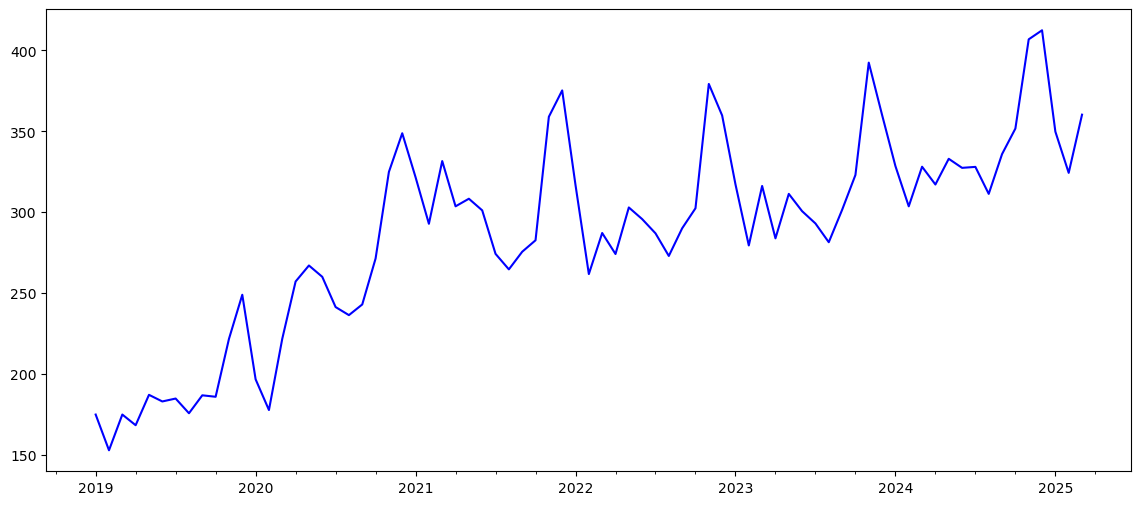

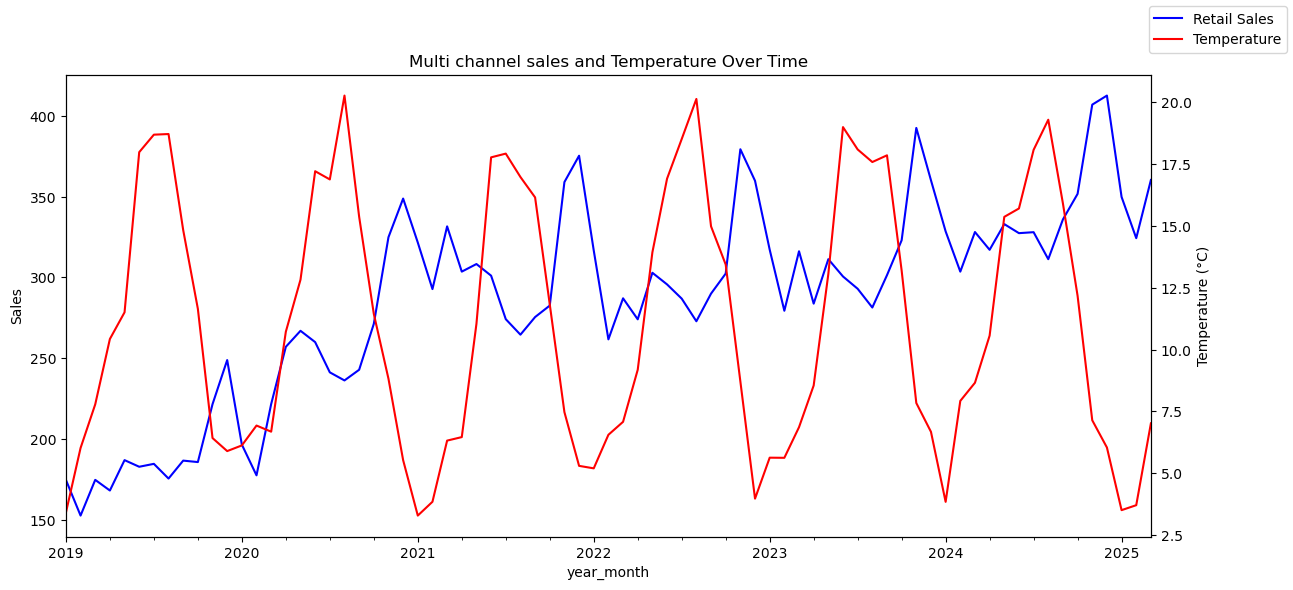

In [9]:
fig, ax1 = plt.subplots(figsize=(14, 6))
df[sales_col].plot(ax=ax1, label='Retail Sales', color='blue')
ax2 = ax1.twinx()
df['Temperature'].plot(ax=ax2, label='Temperature', color='red')

ax1.set_ylabel('Sales')
ax2.set_ylabel('Temperature (°C)')
plt.title('Multi channel sales and Temperature Over Time')
fig.legend(loc="upper right")
plt.show()

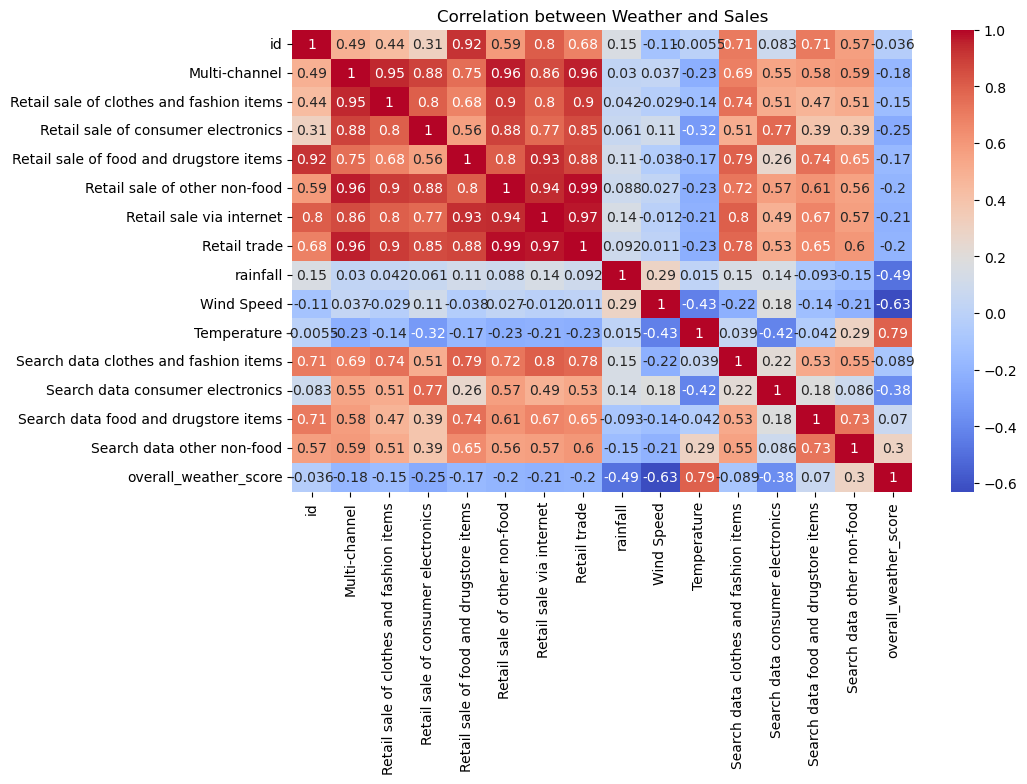

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Weather and Sales")
plt.show()

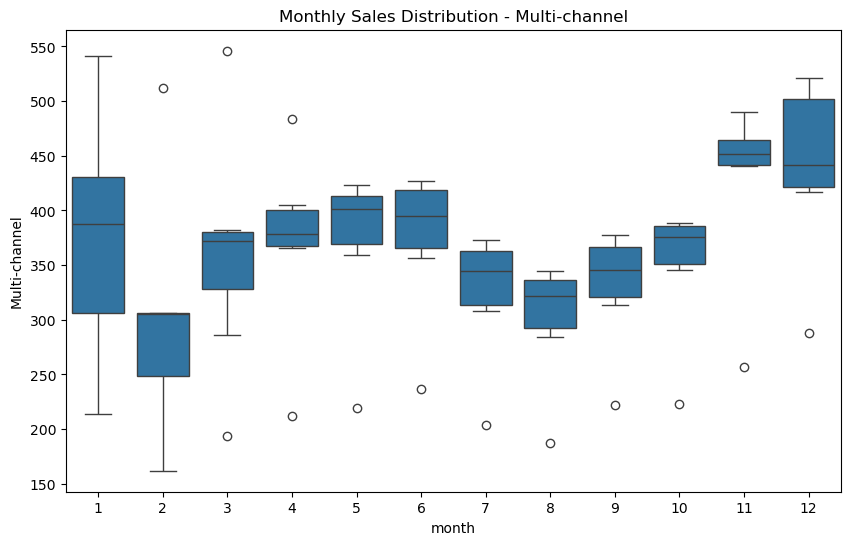

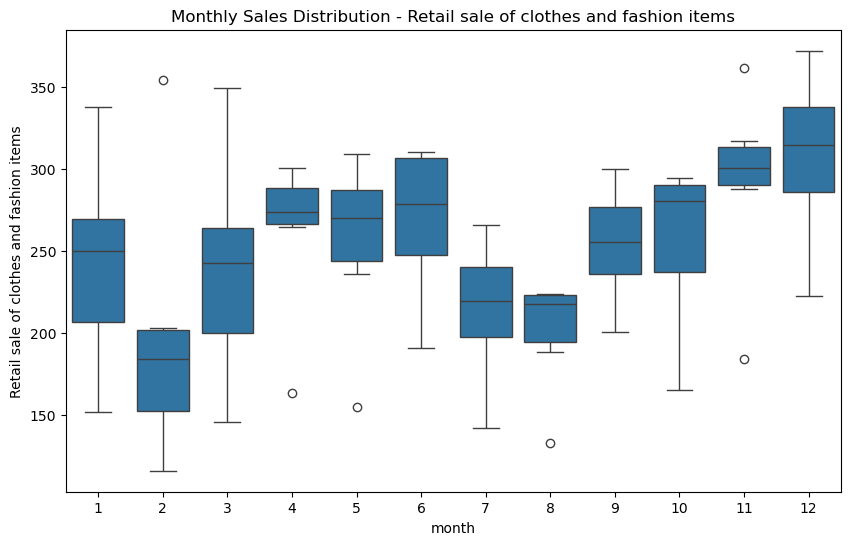

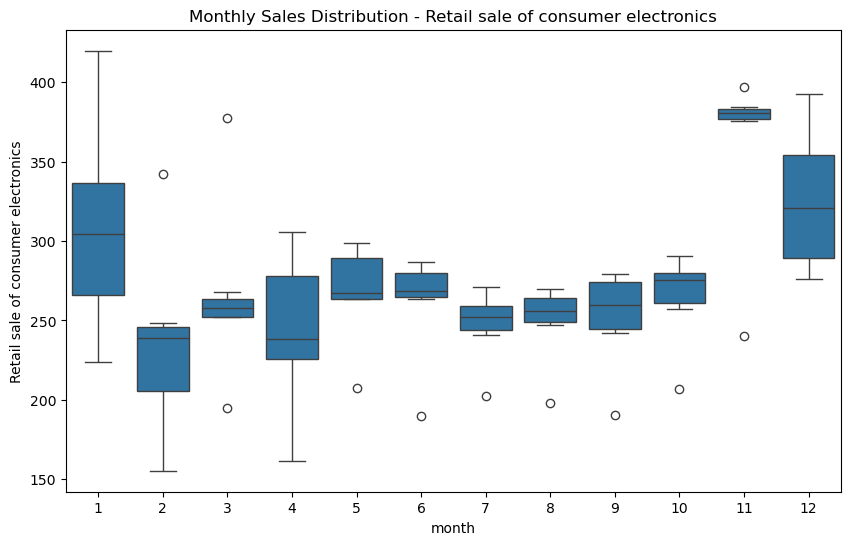

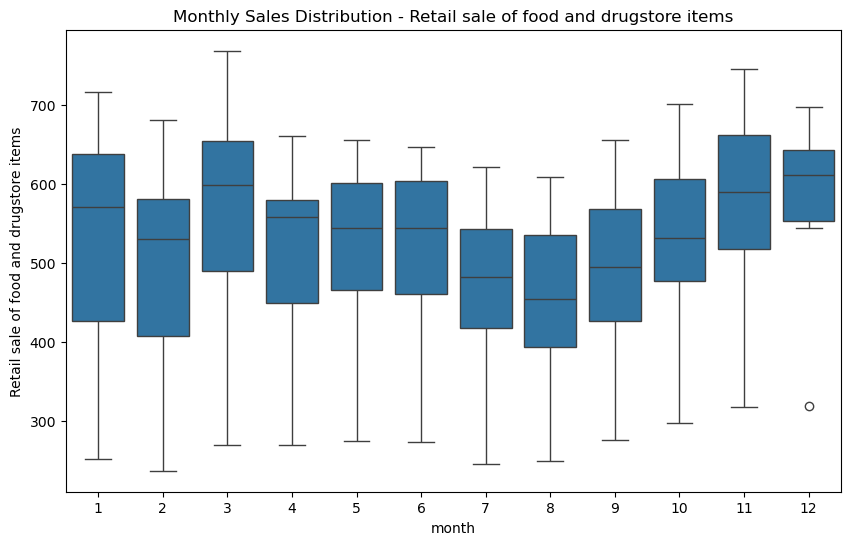

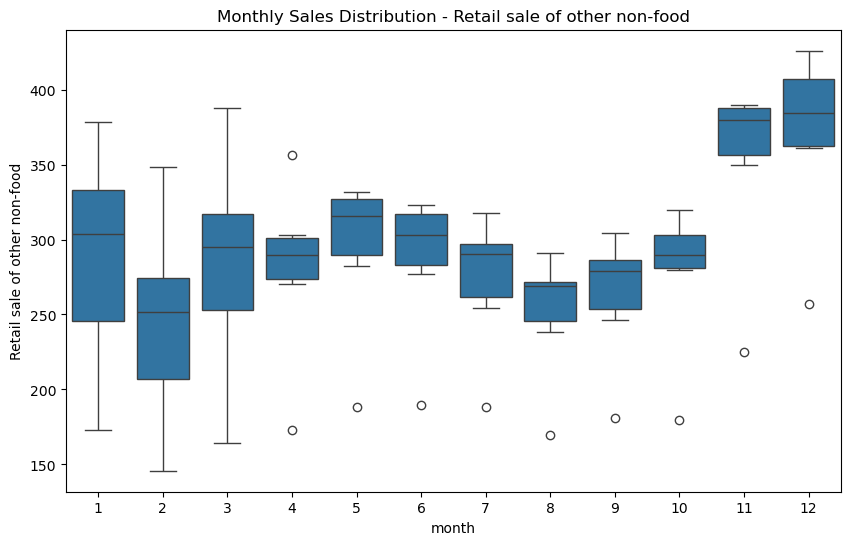

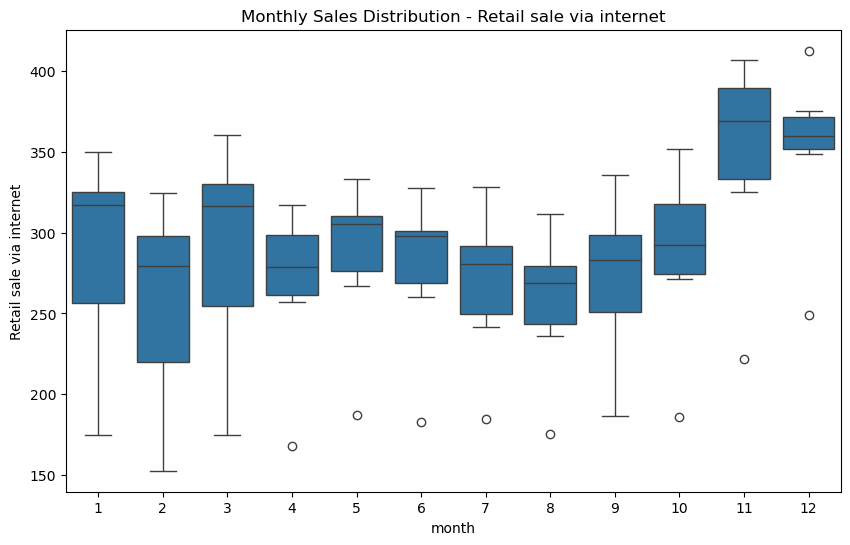

In [11]:
df['month'] = df.index.month
category_cols = ['Multi-channel', 'Retail sale of clothes and fashion items', 'Retail sale of consumer electronics', 'Retail sale of food and drugstore items', 'Retail sale of other non-food', 'Retail sale via internet']

for col in category_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='month', y=col, data=df)
    plt.title(f"Monthly Sales Distribution - {col}")
    plt.show()

Text(50.7222222222222, 0.5, 'Product Category')

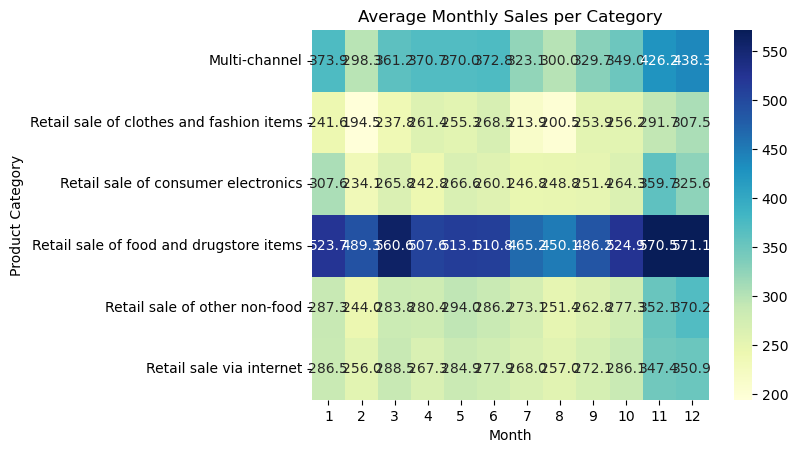

In [12]:
monthly_avg = df.groupby(df.index.month)[category_cols].mean()
sns.heatmap(monthly_avg.T, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Monthly Sales per Category")
plt.xlabel("Month")
plt.ylabel("Product Category")


KeyError: 'Precipitation'

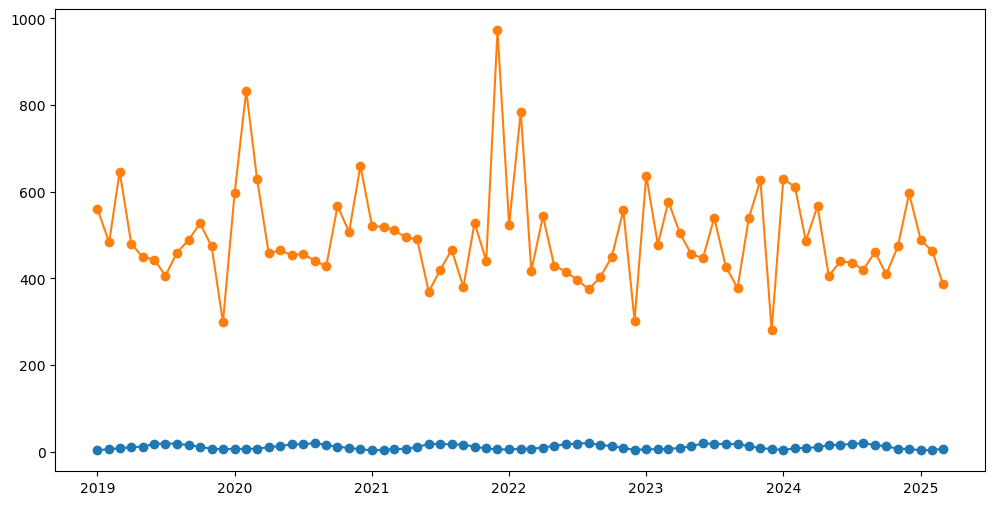

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], label='Temperature (°C)', marker='o')
plt.plot(df.index, df['Wind Speed'], label='Wind Speed', marker='o')
plt.plot(df.index, df['Precipitation'], label='Precipitation (RH)', marker='o')

plt.title('Weather Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

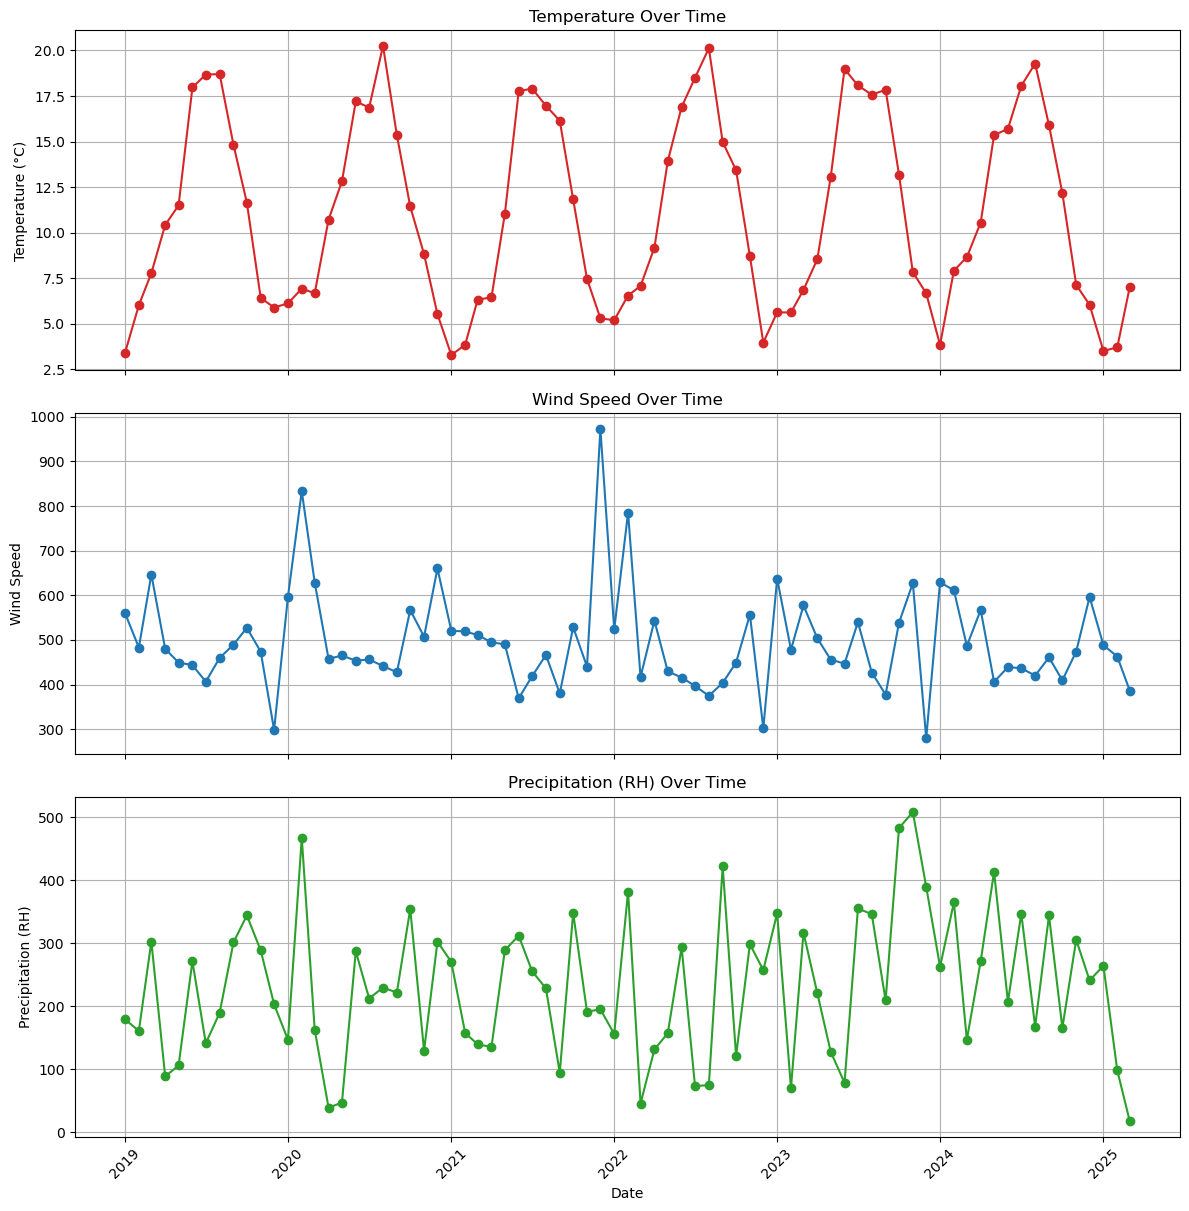

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)


axes[0].plot(df.index, df['Temperature'], marker='o', color='tab:red')
axes[0].set_title('Temperature Over Time')
axes[0].set_ylabel('Temperature (°C)')
axes[0].grid(True)


axes[1].plot(df.index, df['Wind Speed'], marker='o', color='tab:blue')
axes[1].set_title('Wind Speed Over Time')
axes[1].set_ylabel('Wind Speed')
axes[1].grid(True)


axes[2].plot(df.index, df['rainfall'], marker='o', color='tab:green')
axes[2].set_title('Precipitation (RH) Over Time')
axes[2].set_ylabel('Precipitation (RH)')
axes[2].set_xlabel('Date')
axes[2].grid(True)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

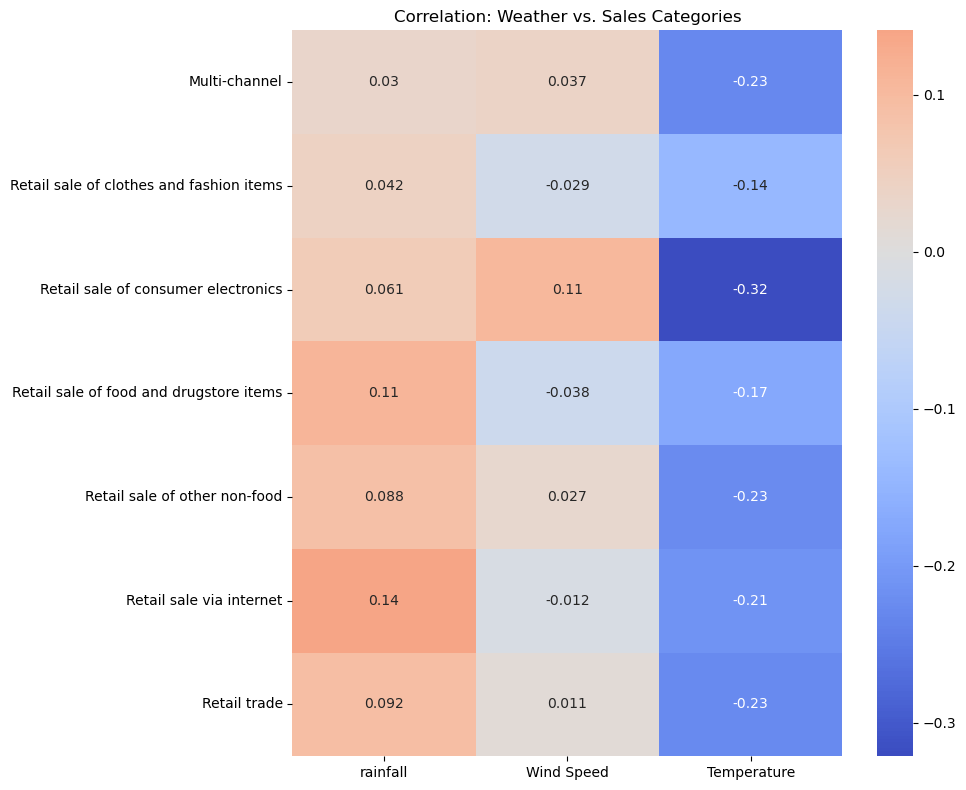

In [19]:
###first research question plots

sales_cols = [
    'Multi-channel',
    'Retail sale of clothes and fashion items',
    'Retail sale of consumer electronics',
    'Retail sale of food and drugstore items',
    'Retail sale of other non-food',
    'Retail sale via internet',
    'Retail trade'
]

weather_cols = ['rainfall', 'Wind Speed', 'Temperature']

sub_corr = df[weather_cols + sales_cols].corr().loc[weather_cols, sales_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(sub_corr.T, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation: Weather vs. Sales Categories")
plt.tight_layout()
plt.show()


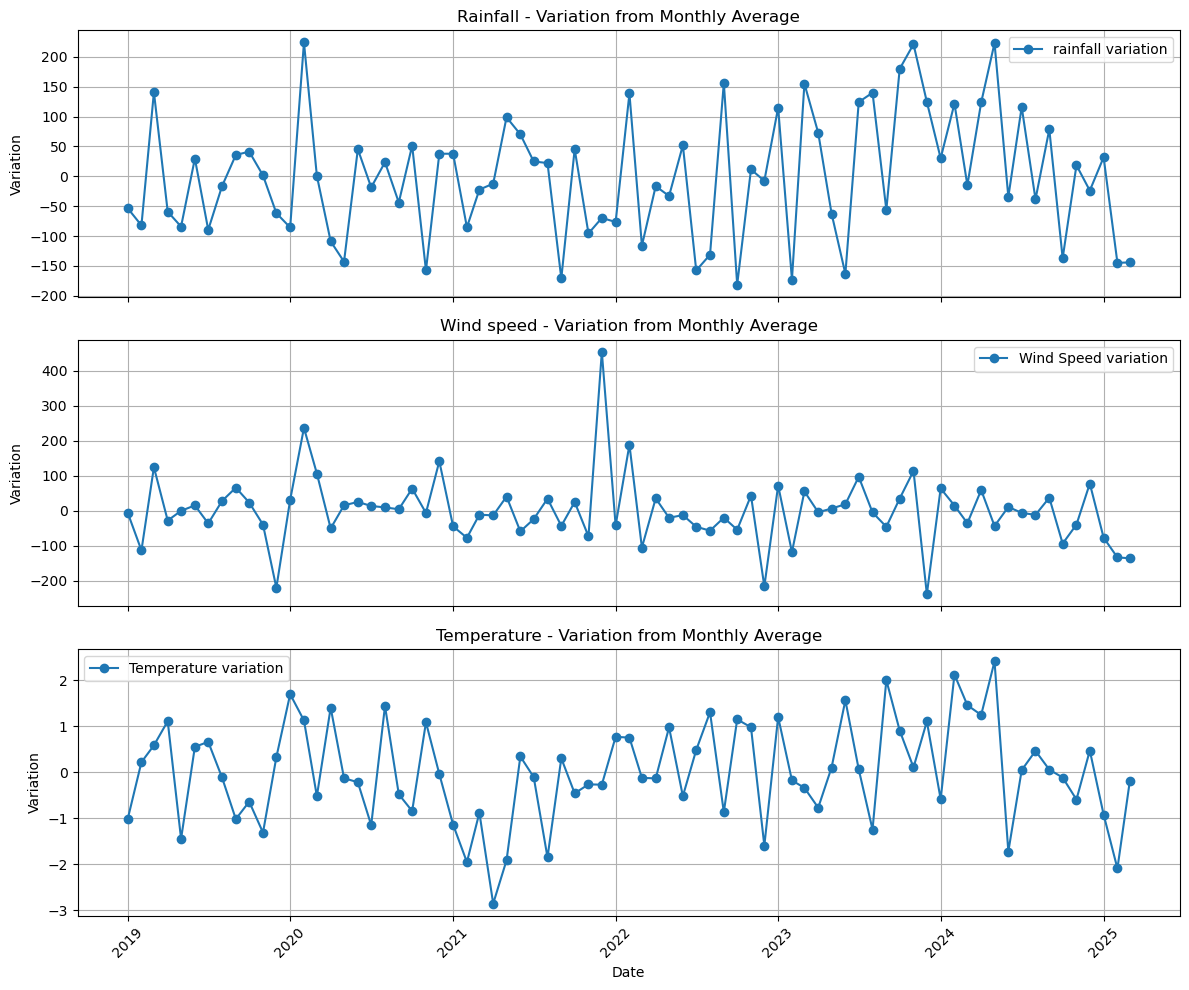

In [20]:
monthly_weather_avg = df.groupby('month')[weather_cols].transform('mean')
weather_variation = df[weather_cols] - monthly_weather_avg

fig, axes = plt.subplots(len(weather_cols), 1, figsize=(12, 10), sharex=True)

for i, col in enumerate(weather_cols):
    ax = axes[i]
    ax.plot(df.index, weather_variation[col], label=f"{col} variation", color='tab:blue', marker='o')
    ax.set_title(f"{col.capitalize()} - Variation from Monthly Average")
    ax.set_ylabel("Variation")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




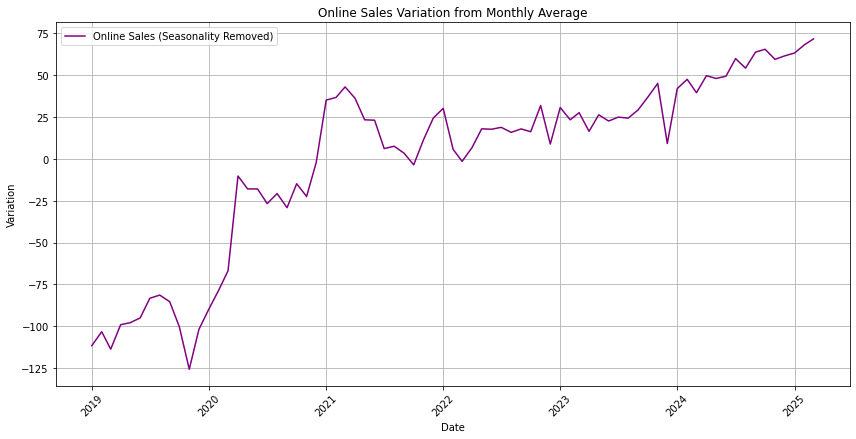

In [27]:
sales_col = 'Retail sale via internet'
monthly_sales_avg = df.groupby('month')[sales_col].transform('mean')
sales_variation = df[sales_col] - monthly_sales_avg

plt.figure(figsize=(12, 6))
plt.plot(df.index, sales_variation, label='Online Sales (Seasonality Removed)', color='purple')
plt.title("Online Sales Variation from Monthly Average")
plt.xlabel("Date")
plt.ylabel("Variation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



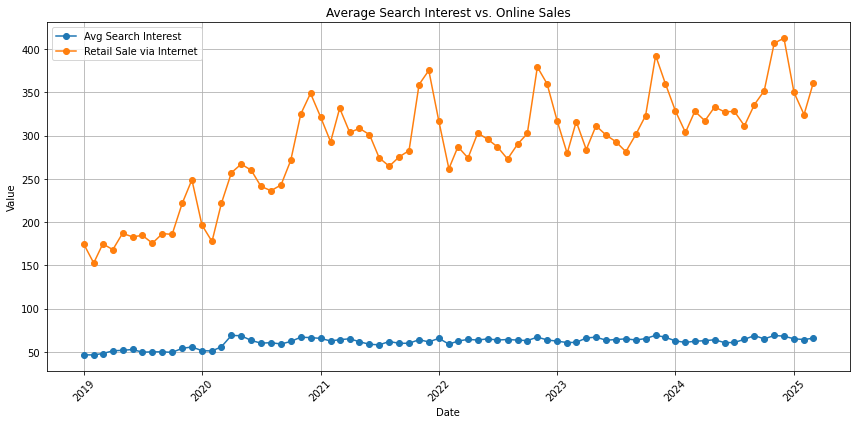

In [36]:
#Third research question plots

search_cols = [
    "Search data clothes and fashion items",
    "Search data consumer electronics",
    "Search data food and drugstore items",
    "Search data other non-food"
]
df_search['Avg Search Interest'] = df_search[search_cols].mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(df_search.index, df_search['Avg Search Interest'], label='Avg Search Interest', marker='o')
plt.plot(df.index, df['Retail sale via internet'], label='Retail Sale via Internet', marker='o')
plt.title("Average Search Interest vs. Online Sales")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [38]:
df.index = pd.to_datetime(df.index)
df_search.index = pd.to_datetime(df_search.index)

df_combined = df.join(df_search, how='inner')


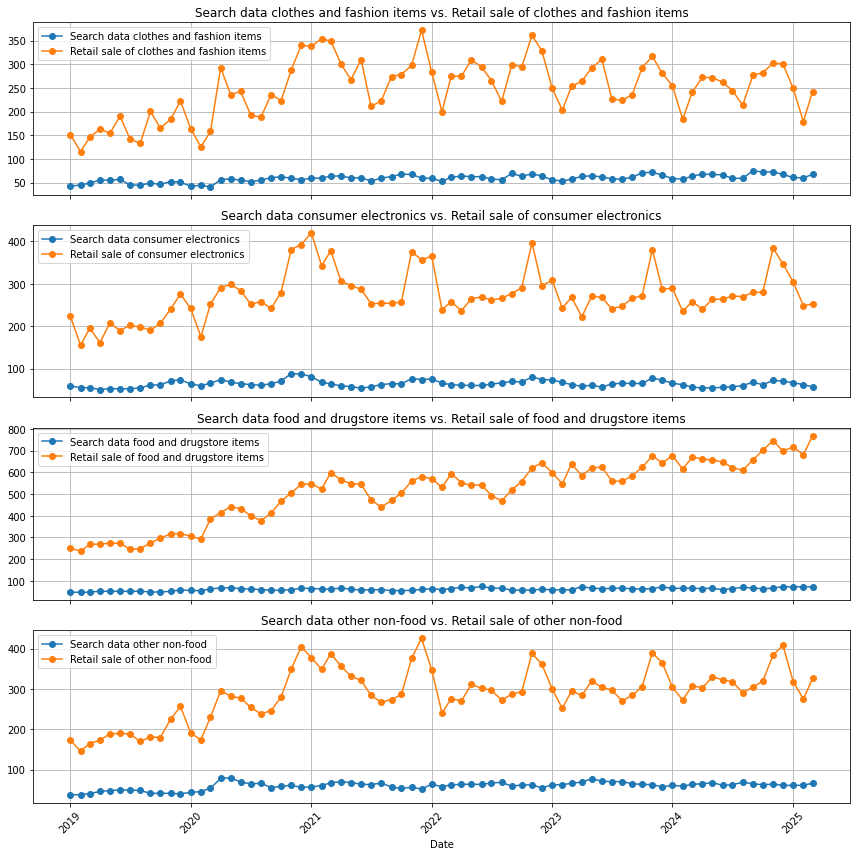

In [42]:
category_map = {
    "Search data clothes and fashion items": "Retail sale of clothes and fashion items",
    "Search data consumer electronics": "Retail sale of consumer electronics",
    "Search data food and drugstore items":"Retail sale of food and drugstore items" ,
    "Search data other non-food": "Retail sale of other non-food"}

n = len(category_map)
fig, axes = plt.subplots(n, 1, figsize=(12, 3 * n), sharex=True)

if n == 1:
    axes = [axes]

for i, (search_col, sales_col) in enumerate(category_map.items()):
    axes[i].plot(df_combined.index, df_combined[search_col], label=search_col, marker='o')
    axes[i].plot(df_combined.index, df_combined[sales_col], label=sales_col, marker='o')
    axes[i].set_title(f"{search_col} vs. {sales_col}")
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



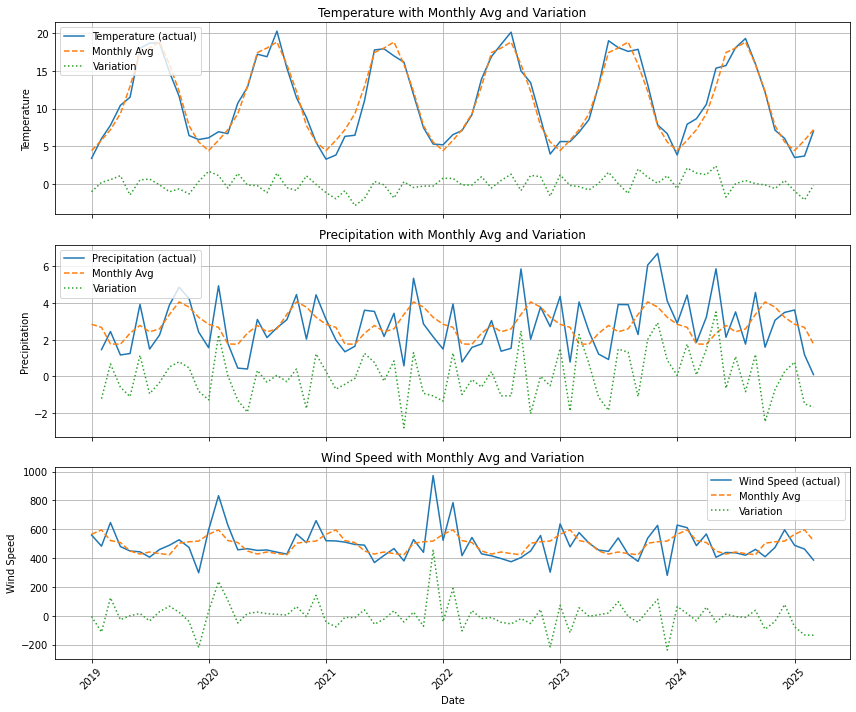

In [44]:
weather_cols = ['Temperature', 'Precipitation', 'Wind Speed']
df['month'] = df.index.month

monthly_weather_avg = df.groupby('month')[weather_cols].transform('mean')
weather_variation = df[weather_cols] - monthly_weather_avg

fig, axes = plt.subplots(len(weather_cols), 1, figsize=(12, 10), sharex=True)

for i, col in enumerate(weather_cols):
    ax = axes[i]
    ax.plot(df.index, df[col], label=f"{col} (actual)", color='tab:blue')
    ax.plot(df.index, monthly_weather_avg[col], label="Monthly Avg", linestyle='--', color='tab:orange')
    ax.plot(df.index, weather_variation[col], label="Variation", linestyle=':', color='tab:green')

    ax.set_title(f"{col} with Monthly Avg and Variation")
    ax.set_ylabel(col)
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
df.columns

Index(['id', 'Periods', 'Multi-channel',
       'Retail sale of clothes and fashion items',
       'Retail sale of consumer electronics',
       'Retail sale of food and drugstore items',
       'Retail sale of other non-food', 'Retail sale via internet',
       'Retail trade', 'rainfall', 'Wind Speed', 'Temperature', 'Date',
       'Search data clothes and fashion items',
       'Search data consumer electronics',
       'Search data food and drugstore items', 'Search data other non-food',
       'overall_weather_score', 'month'],
      dtype='object')

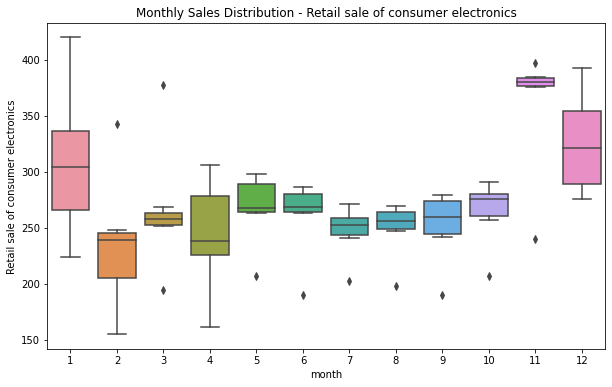

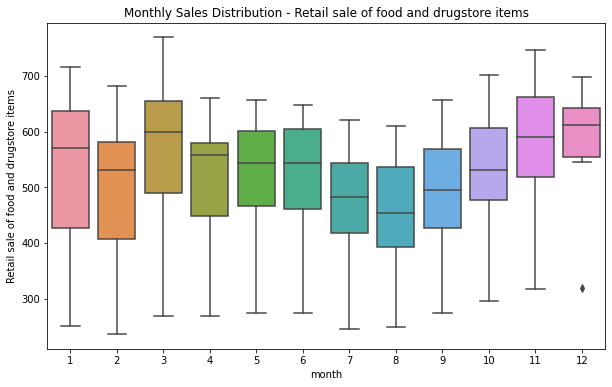

In [ ]:
### second research question plots


cols = [ 'Retail sale via internet', 'Retail sale of consumer electronics', 'Retail sale of food and drugstore items']

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='month', y=col, data=df)
    plt.title(f"Monthly Sales Distribution - {col}")
    plt.show()

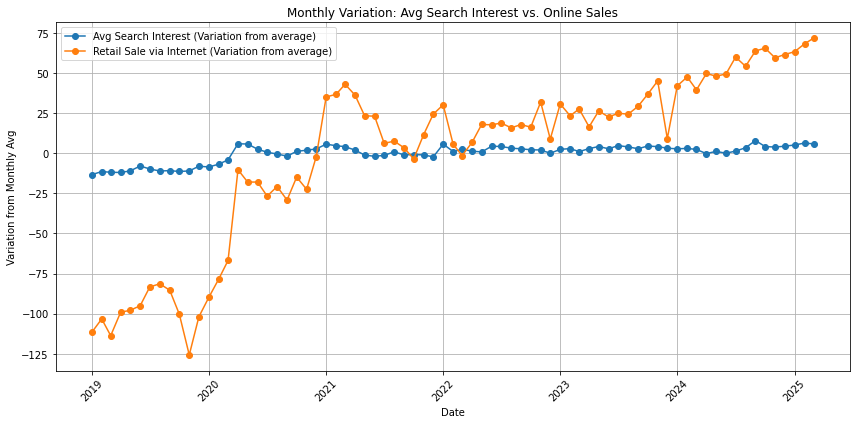

In [48]:
df['month'] = df.index.month
df_search['month'] = df_search.index.month

monthly_sales_avg = df.groupby('month')['Retail sale via internet'].transform('mean')
monthly_search_avg = df_search.groupby('month')['Avg Search Interest'].transform('mean')

sales_var = df['Retail sale via internet'] - monthly_sales_avg
search_var = df_search['Avg Search Interest'] - monthly_search_avg

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, search_var, label='Avg Search Interest (Variation from average)', marker='o')
plt.plot(df.index, sales_var, label='Retail Sale via Internet (Variation from average)', marker='o')
plt.title("Monthly Variation: Avg Search Interest vs. Online Sales")
plt.xlabel("Date")
plt.ylabel("Variation from Monthly Avg")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
